<a href="https://colab.research.google.com/github/PaulToronto/Johns-Hopkins-Coursera-Applied-Calculus-With-Python/blob/main/2_1_Introduction_to_Functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2.1 Introduction to Functions

## 2.1.1 Theory: Functions

In [1]:
import sympy as sp 
import ipywidgets as widgets
from math import isnan

sp.init_printing(use_unicode=True)

In [2]:
def display_f_of_x(str_expr):
    f = sp.parse_expr(str_expr)

    x = f.free_symbols.pop()

    sp.plot(f, 
            line_color='red',
            title='$f(x) = ' + sp.latex(f) + '$\n'
            )

    x_intercepts = list()
    for soln in sp.solve(f):
        if soln.is_real:
            x_intercepts.append(soln)
    x_intercepts = None if len(x_intercepts) == 0 else x_intercepts


    y_intercept = None if isnan(f.subs(x, 0)) else f.subs(x, 0)

    slope = f.diff()
    
    domain = sp.calculus.util.continuous_domain(f, x, sp.S.Reals)

    try:
        range = sp.calculus.util.function_range(f, x, sp.S.Reals)
    except NotImplementedError:
        range = 'Not found'

    print('\nX-intercepts:')
    display(x_intercepts)
    print('\nY-intercept:')
    display(y_intercept)
    print('\nSlope (derivative):')
    display(slope)
    print('\nDomain:')
    display(domain)
    print('\nRange:')
    display(range)

### Definition

A *function* is a rule that assigns to each element $x$ in a set $A$ exactly one element, called $f(x)$, in a set $B$

### Example: $f(x) = x + 1$

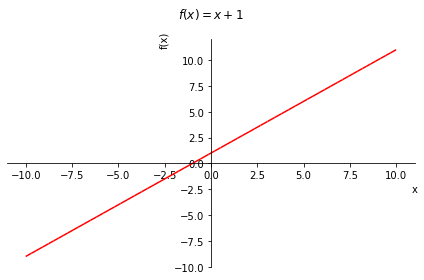


X-intercepts:



Y-intercept:



Slope (derivative):



Domain:



Range:


In [3]:
display_f_of_x('x + 1')

### Example: $f(x) = x^{2}$

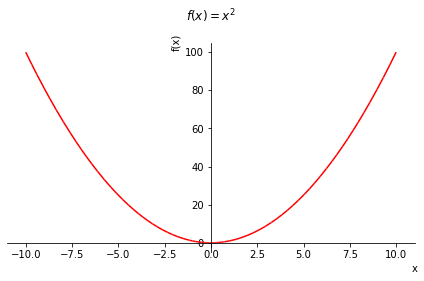


X-intercepts:



Y-intercept:



Slope (derivative):



Domain:



Range:


In [4]:
display_f_of_x('x**2')

### Example: $f(x) = 2^{x}$

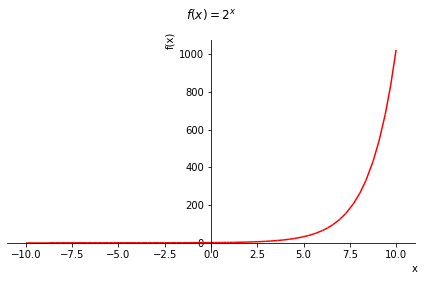


X-intercepts:


None


Y-intercept:



Slope (derivative):



Domain:



Range:


In [5]:
display_f_of_x('2**x')

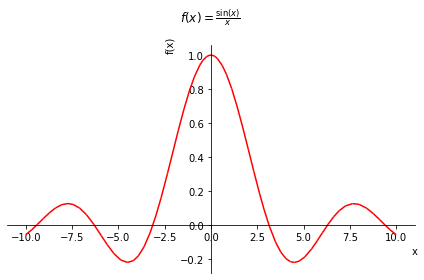


X-intercepts:



Y-intercept:


None


Slope (derivative):


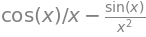


Domain:



Range:


'Not found'

In [6]:
display_f_of_x('sin(x)/x')

### Example: $f(x) = \sqrt{x}$

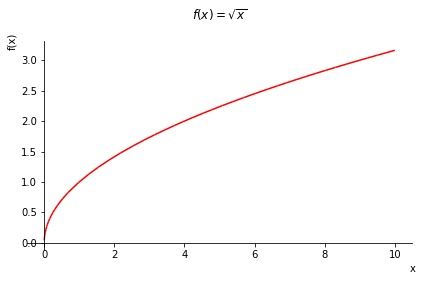


X-intercepts:



Y-intercept:



Slope (derivative):



Domain:



Range:


In [7]:
display_f_of_x('sqrt(x)')

### Example: $f(x) = x^2 + 1$

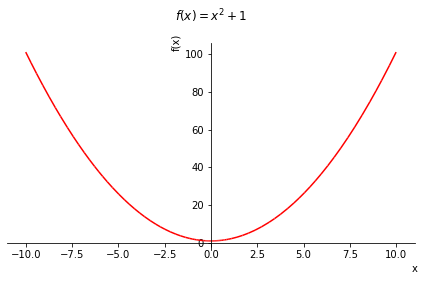


X-intercepts:


None


Y-intercept:



Slope (derivative):



Domain:



Range:


In [8]:
display_f_of_x('x**2 + 1')

### The Difference Quotient

$$
\begin{align}
f(x) &= 3x^2 + 1
\end{align}
$$

$$
\begin{align}
\frac{f(a + h) - f(a)}{h} &= \frac{(3(a + h)^2 + 1) - (3a^2 + 1)}{h}
\\ &= \frac{3a^2 + 6ah + 3h^2 + 1 - 3a^2 - 1}{h}
\\ &= \frac{6ah + 3h^2}{h}
\\ &= 6a + 3h
\end{align}
$$

### Vertical Line Test

If **any** vertical line intersects the graph of a relation more than once, then the relation is not a function.

## 2.1.2 Theory: More about Functions

### Piecewise Defined Functions

#### Example: $f(x) = \begin{cases} x^{2} + 1 & \text{for}\: x \geq 0 \\x & \text{for}\: x < 0 \end{cases}$

In [9]:
x = sp.symbols('x')

p = sp.Piecewise((x**2 + 1, x >= 0),
                 (x, x < 0))

p

⎧ 2               
⎪x  + 1  for x ≥ 0
⎨                 
⎪  x     otherwise
⎩                 

##### Graph (first method)

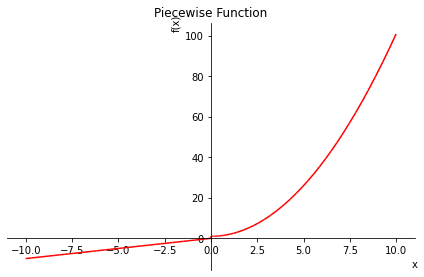

In [10]:
fig = sp.plot(p, 
              line_color='red',
              title='Piecewise Function'
)

##### Graph (second method)

In [11]:
p.args[0][0], p.args[1][0]

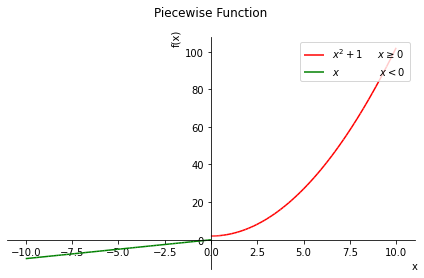

In [12]:
fig = sp.plot((p.args[0][0] + 1, (x, 0, 10)), 
              (p.args[1][0], (x, -10, 0)), 
              title='Piecewise Function\n',
              show=False, 
              legend=True)
fig[0].line_color='red'
fig[0].label = '$x^{2} + 1$' + '\t' + '$x \geq 0$'
fig[1].line_color='green'
fig[1].label = '$x$' + '\t\t' + '$x < 0$'
fig.show()

##### Domain

In [13]:
piece1 = sp.calculus.util.continuous_domain(p.args[0][0], 
                                            x, 
                                            sp.Interval(0, sp.oo))

piece2 = sp.calculus.util.continuous_domain(p.args[1][0],
                                            x,
                                            sp.Interval.open(-sp.oo, 0))

In [14]:
domain = piece1.union(piece2)
domain

##### Range

In [15]:
piece1 = sp.calculus.util.function_range(p.args[0][0],
                                         x,
                                         sp.Interval(0, sp.oo))
piece1

In [16]:
piece2 = sp.calculus.util.function_range(p.args[1][0],
                                         x,
                                         sp.Interval.open(-sp.oo, 0))
piece2

In [17]:
range = piece1.union(piece2)
range

#### Example: $f(x) = \begin{cases} \sqrt{x} & \text{for}\: x > 0 \\- x^{2} & \text{for}\: x < 0 \end{cases}$

In [18]:
p3 = sp.Piecewise((sp.sqrt(x), x > 0),
                  (-x**2, x < 0))
p3

⎧√x   for x > 0
⎪              
⎨  2           
⎪-x   for x < 0
⎩              

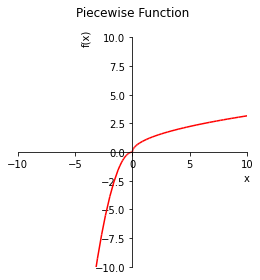

In [19]:
fig3 = sp.plot(p3,
               line_color='red',
               title='Piecewise Function\n', 
               aspect_ratio=(1, 1),
               xlim=[-10, 10],
               ylim=[-10, 10],
               show=False)
fig3.show()

In [20]:
piece1 = sp.calculus.util.continuous_domain(p3.args[0][0], x, sp.Interval.open(0, sp.oo))
piece2 = sp.calculus.util.continuous_domain(p3.args[1][0], x, sp.Interval.open(-sp.oo, 0))
domain = piece1.union(piece2)
domain

In [21]:
piece1 = sp.calculus.util.function_range(p3.args[0][0], x, sp.Interval.open(0, sp.oo))
piece2 = sp.calculus.util.function_range(p3.args[1][0], x, sp.Interval.open(-sp.oo, 0))
range = piece1.union(piece2)
range

### Symmetry

#### Example: $f(x) = \begin{cases} x & \text{for}\: x \geq 0 \\- x & \text{otherwise} \end{cases}$

In [22]:
p2 = sp.Piecewise((x, x >= 0),
                  (-x, x < 0))
p2

⎧x   for x ≥ 0
⎨             
⎩-x  otherwise

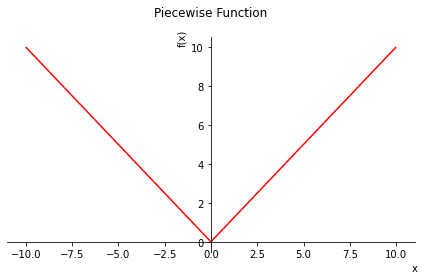

In [23]:
fig2 = sp.plot(p2,
               line_color='red',
               title='Piecewise Function\n', 
               show=False)
fig2.show()

In [24]:
piece1 = sp.calculus.util.continuous_domain(p2.args[0][0], 
                                            x, 
                                            sp.Interval(0, sp.oo))

piece2 = sp.calculus.util.continuous_domain(p2.args[1][0], 
                                            x, 
                                            sp.Interval.open(-sp.oo, 0))
domain = piece1.union(piece2)
domain

In [25]:
piece1 = sp.calculus.util.function_range(p2.args[0][0], x, sp.Interval(0, sp.oo))
piece2 = sp.calculus.util.function_range(p2.args[1][0], x, sp.Interval.open(-sp.oo, 0))
piece1, piece2

In [26]:
range = piece1.union(piece2)
range

#### Example: $f(x) = \left|{x}\right|$

In [27]:
f = sp.Abs(x)
f

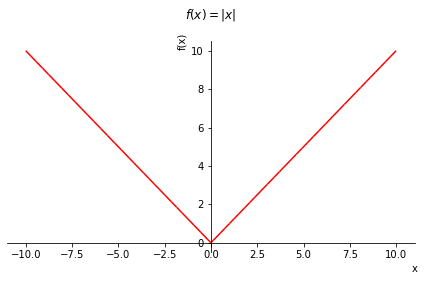

In [28]:
sp.plot(f, line_color='red', title='$f(x) = ' + sp.latex(f) + '$\n');

In [29]:
domain = sp.calculus.util.continuous_domain(f, x, sp.S.Reals)
domain

### Even and Odd Functions

#### Even functions

$f(x)$ is *even* if $f(x) = f(-x)$ for all values of $x$

- even functions have **y-axis symmetry**
- examples:
    - $y = x^2$, $y=x^n$ where n is even
    - $y = \left|{x}\right|$
    - $y = \cos{\left(x \right)}$

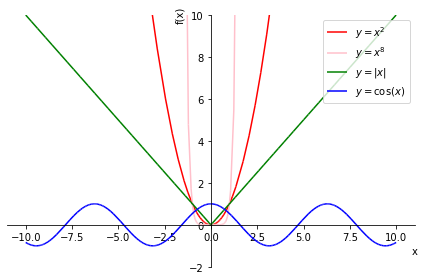

In [30]:
fig = sp.plot(x**2, x**8, sp.Abs(x), sp.cos(x), 
              ylim=[-2, 10],
              legend=True,
              show=False)

fig[0].line_color='red'
fig[0].label = '$y = ' + sp.latex(x**2) + '$'

fig[1].line_color='pink'
fig[1].label = '$y = ' + sp.latex(x**8) + '$'

fig[2].line_color='green'
fig[2].label = '$y = ' + sp.latex(sp.Abs(x)) + '$'

fig[3].line_color='blue'
fig[3].label = '$y = ' + sp.latex(sp.cos(x)) + '$'

fig.show()

#### Odd functions

$f(x)$ is *odd* if $f(-x) = -f(x)$ for all values of $x$

- even functions have **origin symmetry**
- examples:
    - $y = x^3$, $y=x^n$ where n is odd
    - $y = \sin{\left(x \right)}$

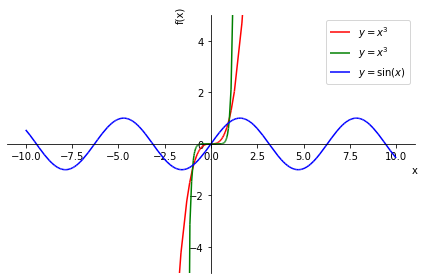

In [31]:
fig = sp.plot(x**3, x**9, sp.sin(x), 
              ylim=[-5, 5],
              legend=True,
              show=False)

fig[0].line_color='red'
fig[0].label = '$y = ' + sp.latex(x**3) + '$'

fig[1].line_color='green'
fig[1].label = '$y = ' + sp.latex(x**3) + '$'

fig[2].line_color='blue'
fig[2].label = '$y = ' + sp.latex(sp.sin(x)) + '$'

fig.show()

### Increasing and Decreasing

#### Increasing

$f$ is *increasing* on interval $[a, b]$ 
- when $x_1 < x_2$ then $f(x_1) < f(x_2)$
- the function is "going up" when moving from left to right

#### Decreasing

$f$ is *decreasing* on interval $[a, b]$ 
- when $x_1 < x_2$ then $f(x_1) > f(x_2)$
- the function is "going down" when moving from left to right

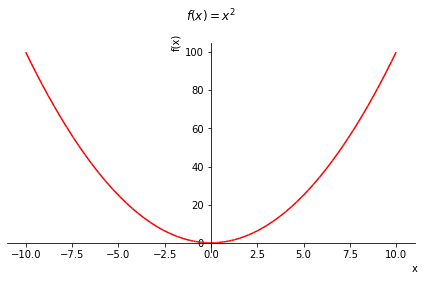

In [32]:
sp.plot(x**2, 
        line_color='red', 
        title='$f(x) =' + sp.latex(x**2) + '$\n');

$f(x) = x^2$ is **increasing** on the interval $(0, \infty)$ and **decreasing** on the interval $(-\infty, 0)$

## 2.1.3 Reading: Functions and Linear Functions

### Functions

A **function** is a relationship between a set of inputs and a set of outputs, where each input corresponds to exactly one output.

The input is also called the **independent variable**, and the output is called the **dependent variable**. 

The input of a function is also called the **argument**.

The set of all possible inputs for the function is called the **domain**, and the set of all possible outputs is called the **range**.

Functions are often written in **function notation**.  $y = f(x)$  is read as "y equals f of x." This notation means that $y$, the dependent variable, is a function of the independent variable, $x$. 

#### Representations of functions

Functions can be given through mathematical formulas, tables, graphs, and verbal descriptions. 

The tools of calculus are used on functions that are given as mathematical formulas. As a result, in this course we will see some **modeling functions** - mathematical formulas that fit real-world scenarios expressed through tables of data or visuals.

### Linear Functions

A **linear function** is a function of the form $f(x) = mx + b$, where $m$ and $b$ are constants.

The graph of a inear function is a straight line with slope $m$ and y-intercept $(0,b)$.

#### Calculating slope

$m = \frac{f(x_2) - f(x_1)}{x_2 - x_1}$

The slope of a linear function can be thought of as the **rate of change** in the function.

#### Parallel and perpendicular

**Parallel lines**, must have the same sloe.

**Perpendicular lines** intersect at right angles, A line that is perpendicular to a line of slope $m$ has slope $\frac{1}{m}$, the negative reciprocal of $m$.

#### Forms for linear function

There are two main forms:

1. **Slope-Intercept Form**
    - $y = mx + b$
    - $m$ is the slope and $(0,b)$ is the y-intercept
2. **Point-Slope Form**
    - $y - y_0 = m(x - x_0)$
    - $(x_0,y_0)$ are the coorindates of an arbitrary point on the line.

## 2.1.4 Theory: Graphing and Composition

### Common Types of Functions

#### Linear

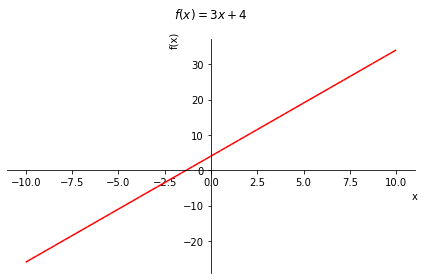


X-intercepts:



Y-intercept:



Slope (derivative):



Domain:



Range:


In [33]:
display_f_of_x('3*x + 4')

#### Quadratic

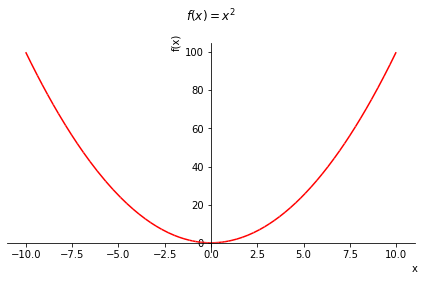


X-intercepts:



Y-intercept:



Slope (derivative):



Domain:



Range:


In [34]:
display_f_of_x('x**2')

#### Absolute Value

- this is actually a piecewise function

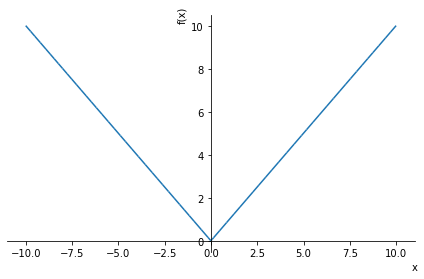

In [35]:
sp.plot(sp.Abs(x));

#### Cubic

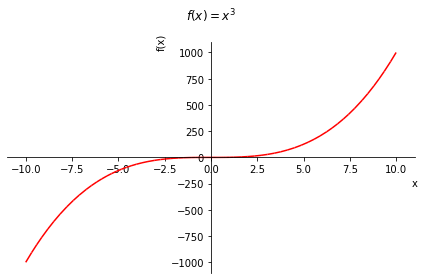


X-intercepts:



Y-intercept:



Slope (derivative):



Domain:



Range:


In [36]:
display_f_of_x('x**3')

#### Sine and Cosine

The domain of the sine function is:


The range of the sine function is:


The domain of the cosine function is:


The range of the cosine function is:


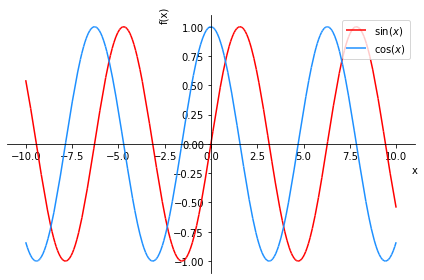

In [37]:
p = sp.plot(sp.sin(x), sp.cos(x), legend=True, show=False)

p[0].line_color = 'red'
p[0].label = '$' + sp.latex(sp.sin(x)) + '$'

p[1].line_color = 'dodgerblue'
p[1].label = '$' + sp.latex(sp.cos(x)) + '$'

domain_sin = sp.calculus.util.continuous_domain(sp.sin(x), x, sp.S.Reals)

try:
    range_sin = sp.calculus.util.function_range(sp.sin(x), x, sp.S.Reals)
except:
    range_sin = 'Not found'

print('The domain of the sine function is:')
display(domain_sin)
print('The range of the sine function is:')
display(range_sin)

domain_cos = sp.calculus.util.continuous_domain(sp.cos(x), x, sp.S.Reals)

try:
    range_cos = sp.calculus.util.function_range(sp.cos(x), x, sp.S.Reals)
except:
    range_cos = 'Not found'

print('The domain of the cosine function is:')
display(domain_cos)
print('The range of the cosine function is:')
display(range_cos)

p.show()

### Function Composition

#### Definition

$f \circ g$ is read as '*f composed with g*'

$(f \circ g)(x) = f(g(x))$

#### Example

$f(x) = 2x - 1$
<br>
$g(x) = x^3$

$
\begin{align}
(f \circ g)(x) &= f(g(x)) \\
&= f(x^3) \\
&= 2x^3 - 1 \\\\
(g \circ f)(x) &= g(f(x)) \\
&= g(2x-1) \\
&= (2x - 1)^3
\end{align} 
$

Composition is **not commutative**

In [38]:
f = 2*x - 1
g = x**3
f_o_g = f.subs(x, g)
g_o_f = g.subs(x, f)

In [39]:
f, g, f_o_g, g_o_f

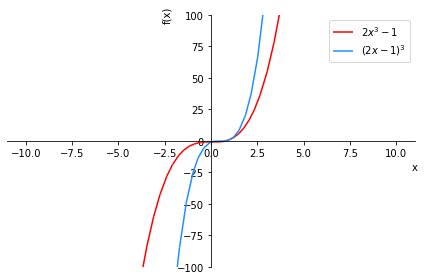

In [40]:
p = sp.plot(f_o_g, g_o_f, 
            legend=True, 
            ylim=[-100, 100],
            show=False)

p[0].line_color='red'
p[0].label = '$' + sp.latex(f_o_g) + '$'
p[1].line_color='dodgerblue'
p[1].label = '$' + sp.latex(g_o_f) + '$'

p.show()

#### Example

$f(x) = \sqrt{x}$
<br>
$g(x) = \sqrt[3]{1 - x}$

In [41]:
f = sp.sqrt(x)
g = sp.cbrt(1 - x)

In [42]:
f, g

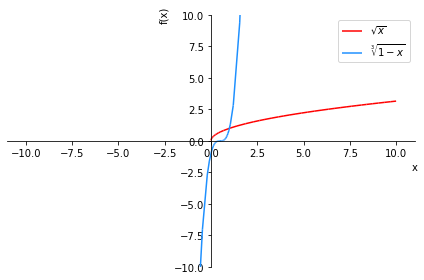

In [43]:
p = sp.plot(f, g_o_f, 
            legend=True, 
            ylim=[-10, 10],
            show=False)

p[0].line_color='red'
p[0].label = '$' + sp.latex(f) + '$'
p[1].line_color='dodgerblue'
p[1].label = '$' + sp.latex(g) + '$'

p.show()

$
\begin{align}
(f \circ f)(x) &= f(f(x)) \\
&= f(\sqrt{x}) \\
&= \sqrt{\sqrt{x}} \\\\
(g \circ g)(x) &= g(g(x)) \\
&= g\left( \sqrt[3]{1 - x}\right) \\
&= g((1 - x)^\frac{1}{3}) \\
&= (1 - (1 - x)^\frac{1}{3})^\frac{1}{3}
\end{align}
$

In [44]:
f_o_f = f.subs(x, f)
g_o_g = g.subs(x, g)

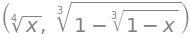

In [45]:
f_o_f, g_o_g

#### Example

$g(s) = \sqrt{\cos{s}}$

Find a function $f$ and a function $h$, such that $g(s) = (f \circ h)(s)$

##### Solution

$f(s) = \sqrt{s}$
<br>
$g(s) = \cos{s}$

In [46]:
s = sp.symbols('s')

In [47]:
g = sp.sqrt(sp.cos(s))
g

In [48]:
s = sp.symbols('s')
f = sp.sqrt(s)
h = sp.cos(s)

f, h

In [49]:
f_o_h = f.subs(s, h)
f_o_h

In [50]:
g.equals(f_o_h)

True

In [51]:
g == f_o_h

True

## 2.1.5 Python: Graphing Functions

### Simple plot example

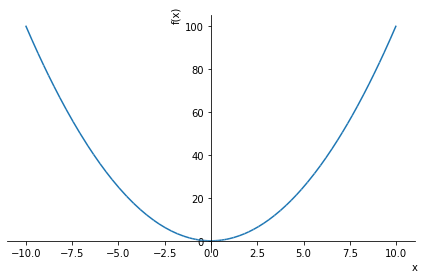

In [52]:
p = sp.plotting.plot(x**2, show=False)
p.show()

### Saving plot images

In [53]:
from google.colab import drive
drive.mount('gdrive')

Drive already mounted at gdrive; to attempt to forcibly remount, call drive.mount("gdrive", force_remount=True).


In [54]:
import os
os.getcwd()

'/content'

In [55]:
os.listdir('/content')

['.config', 'gdrive', 'sample_data']

In [56]:
os.listdir()

['.config', 'gdrive', 'sample_data']

In [57]:
images_path = 'gdrive/MyDrive/'
images_path += 'Colab Notebooks/'
images_path += 'Data Science/'
images_path += 'Johns Hopkins - Applied Calculus with Python/'
images_path += 'images/'
images_path

'gdrive/MyDrive/Colab Notebooks/Data Science/Johns Hopkins - Applied Calculus with Python/images/'

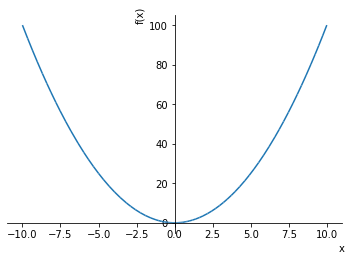

In [58]:
p.save(images_path + 'x_squared_plot.png')

### Example

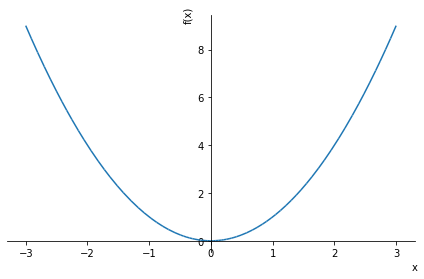

In [59]:
plot1 = sp.plot(x**2, (x, -3, 3))

In [60]:
type(plot1)

sympy.plotting.plot.Plot

In [61]:
plot1[0]

In [62]:
plot1[0].expr

In [63]:
plot1[0].line_color = 'r'

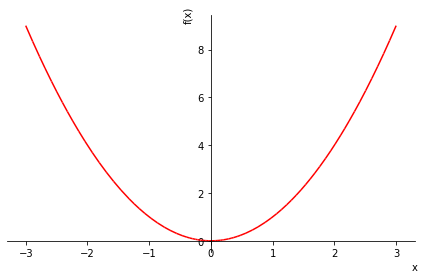

In [64]:
plot1.show()

### Multiple plots

In [65]:
f1 = 3*x + 2
f2 = x**3

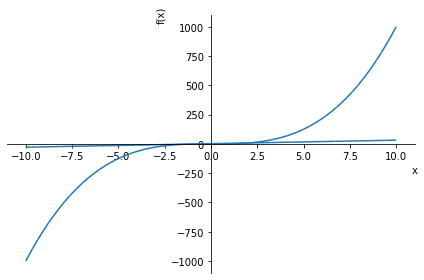

In [66]:
plots2 = sp.plot(f1, f2)

### Piecewise

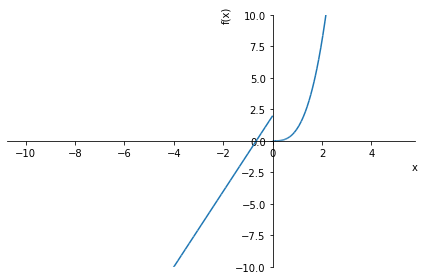

In [67]:
sp.plot((f1, (x, -10, 0)),
        (f2, (x, 0, 5)),
        ylim=(-10, 10));

## 2.1.6 Python: Interactive Quadratic Calculator

In [68]:
import numpy as np

def zeros(a, b, c):
  D = np.sqrt(b**2 - 4*a*c)
  x1 = (-b + D) / (2 * a)
  x2 = (-b - D) / (2 * a)
  
  print('The first root is: ', x1)
  print('The second root is: ', x2)

def print_graph(a, b, c):
    x = sp.symbols('x')
    expr = a*x**2 + b*x + c
    sp.plot(expr, title='$' + sp.latex(expr) + '$\n', line_color='red')

def quad_calc():
    while True:
        print('Welcome to our quadratic calculator')
        a = input('Enter a: ')
        b = input('Enter b: ')
        c = input('Enter c: ')

        zeros(float(a), float(b), float(c))
        print_graph(float(a), float(b), float(c))

        allDone = input('Would you like to solve another quadratic? (y/n)\n')
        if allDone == 'n':
            print('Goodbye')
            break

In [69]:
# quad_calc()

## 2.1.7 Reading: Sample Problems - Introduction to Functions

### Sample Problem 1 - Interpreting a Function

The function $G(s)$ represents the gas mileage of a car (in miles per gallon) traveling at a speed of $s$ miles per hour

#### Part A

What does it means that $G(56) = 24$?

##### Solution:

It means that when the car is traveling at 56 miles per hour, the car is getting 24 miles per gallon.

#### Part B

Write a mathematical statement that represents the following sentence: "The car's mileage while traveling at 80 miles per hour is 60% of its gas mileage at 70 miles per hours.

##### Solution:

$G(80) = .6 * G(70)$

### Sample Problem 2 - Analyzing a Linear Function

Suppose that $k(x)$ is a linear function, such that $k(1) = -4$ and $k(3) = 6$

#### Part A

Find an expression for $k(x)$.

#### Part B

Find the domain and range of $k(x)$

##### Solution:

We know that: <br>
$
m + b = -4 \\
3m + b = 6
$

In [70]:
m, b = sp.symbols('m b')

# sympy.solvers.
sp.linsolve([m + b + 4, 3*m + b - 6], (m, b))

In [71]:
# the comma is called "sequence unpacking"
answer = sp.solvers.linsolve([m + b + 4, 3*m + b - 6], (m, b))
answer

In [72]:
answer = list(answer)
answer

In [73]:
m = answer[0][0]
b = answer[0][1]

f = m * x + b
f

In [74]:
domain = sp.calculus.util.continuous_domain(f, x, sp.S.Reals)
domain

In [75]:
range = sp.calculus.util.function_range(f, x, sp.S.Reals)
range

The expression is $k(x) = 5x - 9$. Its domain is $\mathbb{R}$ and its range is $\mathbb{R}$.

In [76]:
# another solution, since the points (1, -4) and (3, 6)
# are on the line

m = (-4 - 6) / (1 - 3)
m

In [77]:
# y = mx + b
# => b = y - mx
b = 6 - m * 3
b

### Sample Problem 3

Define a function, **linear(a, b, c, d)**, which when given the coordinates of two points, returns the equation of the line passing through those two points.

##### Solution:

Using the point-slope form of the equation:

$
y - y_0 = m(x - x_0) \\
\implies y = m(x - x_0) + y_0
$

In [78]:
x = sp.symbols('x')

def linear(a, b, c, d):
    slope = (d - b) / (c - a)
    # point-slope form
    return slope * (x - a) + b

In [79]:
linear(1, -4, 3, 6)

## Quiz